# Detecção de Objeto em Imagens com a Rede YOLO v8


---



# Sobre o Dataset

Este conjunto de dados consiste em 638 imagens coletadas pelo Roboflow de dois aquários nos Estados Unidos: The Henry Doorly Zoo em Omaha (16 de outubro de 2020) e o National Aquarium em Baltimore (14 de novembro de 2020). As imagens foram rotuladas para detecção de objetos pela equipe Roboflow (com a ajuda do SageMaker Ground Truth).

disponivel em: [Link kagle](https://www.kaggle.com/datasets/slavkoprytula/aquarium-data-cots)

As seguintes classes foram rotuladas: fish, jellyfish, penguins, sharks, puffins, stingrays, and starfish. Respectivamente: peixes, águas-vivas, pinguins, tubarões, papagaios-do-mar, arraias e estrelas do mar. A maioria das imagens contém várias caixas delimitadoras.

# Importação de dependências

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
from ultralytics import YOLO
from ultralytics.utils.downloads import GITHUB_ASSETS_STEMS
from ultralytics import YOLO, settings
settings.update({'runs_dir': './runs'})

# Treinamento

In [3]:
model = YOLO('yolov8n')  # Modelo de arquitetura utilizado

100%|██████████| 6.23M/6.23M [00:00<00:00, 54.4MB/s]


In [8]:
model.train(data='/content/Dataset/dataset.yaml',
            epochs=30,
            patience=8,
            batch=16,  # Número de imagens por batch
            imgsz=640,  # Tamanho da imagem
            workers=8,
            pretrained=True,
            resume=False,  # Retomar o treinamento do último checkpoint
            single_cls=False,  # Apenas uma classe
            box=7.5,  # Mais recall, melhor IoU, menos precisão
            cls=0.5,  # Melhor classe Bbox
            dfl=1.5,  # Loss focal distribuído. Melhores limites de bbox
            val=True,

            # Augmentations
            degrees=0.3,
            hsv_s=0.3,
            hsv_v=0.3,
            scale=0.5,
            fliplr=0.5
            )


Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Dataset/dataset.yaml, epochs=30, time=None, patience=8, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 10.7MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Dataset/treinamento/labels... 447 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1100.23it/s]

train: New cache created: /content/Dataset/treinamento/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Dataset/validacao/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1628.62it/s]

val: New cache created: /content/Dataset/validacao/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.539       3.76      1.267        196        640: 100%|██████████| 28/28 [06:29<00:00, 13.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.01s/it]

                   all        127        909     0.0156      0.598     0.0941     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.598      2.497      1.256        174        640: 100%|██████████| 28/28 [06:25<00:00, 13.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.99s/it]

                   all        127        909     0.0206       0.63      0.227      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.609      2.278      1.268        203        640: 100%|██████████| 28/28 [06:17<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.84s/it]

                   all        127        909       0.33      0.288      0.263       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.565       2.08      1.245        269        640: 100%|██████████| 28/28 [06:19<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.14s/it]

                   all        127        909      0.418      0.365      0.348      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.529       1.91      1.238        165        640: 100%|██████████| 28/28 [06:22<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.90s/it]

                   all        127        909      0.438      0.388      0.379      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.457       1.72      1.209        177        640: 100%|██████████| 28/28 [06:20<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.56s/it]

                   all        127        909      0.508      0.502      0.502       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.467      1.656      1.222        263        640: 100%|██████████| 28/28 [06:17<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.60s/it]

                   all        127        909      0.532      0.519      0.485      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.464      1.646      1.216        165        640: 100%|██████████| 28/28 [06:17<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.65s/it]

                   all        127        909      0.692      0.492      0.557      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.424       1.57      1.208        119        640: 100%|██████████| 28/28 [06:13<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.58s/it]

                   all        127        909      0.645      0.528      0.585      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.429      1.526      1.188        194        640: 100%|██████████| 28/28 [06:18<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.33s/it]

                   all        127        909      0.594      0.554      0.609      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.374      1.465      1.183        216        640: 100%|██████████| 28/28 [06:16<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.35s/it]

                   all        127        909      0.738      0.575      0.647      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.331      1.424      1.168        155        640: 100%|██████████| 28/28 [06:12<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.68s/it]

                   all        127        909      0.682      0.623       0.66      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.359      1.395      1.175        140        640: 100%|██████████| 28/28 [06:22<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.59s/it]

                   all        127        909      0.689       0.61      0.651      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.332      1.356      1.162        192        640: 100%|██████████| 28/28 [06:12<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:40<00:00, 10.09s/it]

                   all        127        909       0.72      0.577      0.633      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.358      1.281       1.16        233        640: 100%|██████████| 28/28 [06:22<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.84s/it]

                   all        127        909      0.727      0.642      0.676      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.338      1.262      1.148        232        640: 100%|██████████| 28/28 [06:18<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.16s/it]

                   all        127        909      0.738      0.616      0.672      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.315      1.219       1.14        249        640: 100%|██████████| 28/28 [06:13<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.52s/it]

                   all        127        909      0.655      0.643      0.666      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.313      1.228      1.134        201        640: 100%|██████████| 28/28 [06:13<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.68s/it]

                   all        127        909      0.701      0.684      0.699      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.303      1.185      1.132        192        640: 100%|██████████| 28/28 [06:24<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.37s/it]

                   all        127        909      0.666       0.67      0.704      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.307      1.148      1.124        156        640: 100%|██████████| 28/28 [06:19<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.77s/it]

                   all        127        909      0.781      0.605      0.704      0.414


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.256      1.233      1.114        109        640: 100%|██████████| 28/28 [06:23<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.83s/it]

                   all        127        909      0.712       0.62      0.652      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.227      1.182      1.103        144        640: 100%|██████████| 28/28 [06:11<00:00, 13.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.25s/it]

                   all        127        909      0.751      0.638      0.712      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.211      1.107      1.086        110        640: 100%|██████████| 28/28 [06:09<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.27s/it]

                   all        127        909      0.678      0.682      0.694      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.181       1.08      1.071         87        640: 100%|██████████| 28/28 [06:13<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.77s/it]

                   all        127        909      0.748      0.682       0.72      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.186      1.048      1.076         87        640: 100%|██████████| 28/28 [06:12<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.61s/it]

                   all        127        909      0.717      0.703      0.723      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.156      1.033      1.061         89        640: 100%|██████████| 28/28 [06:20<00:00, 13.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.18s/it]

                   all        127        909      0.749       0.67      0.733      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.181      1.021      1.062         97        640: 100%|██████████| 28/28 [06:09<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:36<00:00,  9.19s/it]

                   all        127        909      0.813      0.646      0.724      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.155     0.9852      1.067        137        640: 100%|██████████| 28/28 [06:17<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:39<00:00,  9.77s/it]

                   all        127        909      0.786      0.678      0.733      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.128     0.9741      1.055        153        640: 100%|██████████| 28/28 [06:10<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.37s/it]

                   all        127        909       0.79      0.681      0.737      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G       1.13     0.9687      1.051         99        640: 100%|██████████| 28/28 [06:11<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:38<00:00,  9.63s/it]

                   all        127        909      0.803      0.688       0.74      0.447



30 epochs completed in 3.473 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:37<00:00,  9.33s/it]


                   all        127        909      0.804      0.688       0.74      0.447
                  fish         63        459      0.872      0.669      0.789      0.459
             jellyfish          9        155      0.853      0.871      0.929      0.527
               penguin         17        104      0.701      0.635      0.679      0.323
                puffin         15         74      0.667      0.515      0.538      0.257
                 shark         28         57      0.804      0.596      0.698       0.45
              starfish         17         27      0.896      0.741      0.759      0.525
              stingray         23         33      0.834      0.788       0.79      0.589
Speed: 11.0ms preprocess, 226.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78df4c3208b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# Validação e teste

In [10]:
model = YOLO('/content/runs/detect/train4/weights/best.pt')

In [12]:
results = model.val(#project='/content/Dataset/resultados',
                    imgsz=640,
                    batch=16,
                    conf=0.001,
                    iou=0.7,  # Non-Maximum Supression (NMS)
                    save_json=False,  # Salvar em JSON {image_id, cls, bbox, conf} de cada imagem no conjunto de dado
                    save_hybrid=False,  # Rótulos de caixa delimitadora + inferência na imagem de saída (Ultralytics 8.0.178 = os resultados são incorretos quando este argumento é True)
                    split='test')  # train, val or test

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/Dataset/teste/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 1526.09it/s]

val: New cache created: /content/Dataset/teste/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:21<00:00,  5.38s/it]


                   all         63        584       0.82      0.692      0.779      0.475
                  fish         30        249      0.785      0.616      0.743      0.429
             jellyfish         11        154      0.826      0.844      0.866      0.544
               penguin          7         82       0.76      0.622      0.736      0.331
                puffin          6         35      0.754      0.457      0.488      0.221
                 shark         14         38      0.853      0.711      0.777      0.536
              starfish          5         11      0.844      0.727      0.907      0.593
              stingray         10         15      0.915      0.867      0.933      0.673
Speed: 4.2ms preprocess, 273.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val2


Curva de confiança

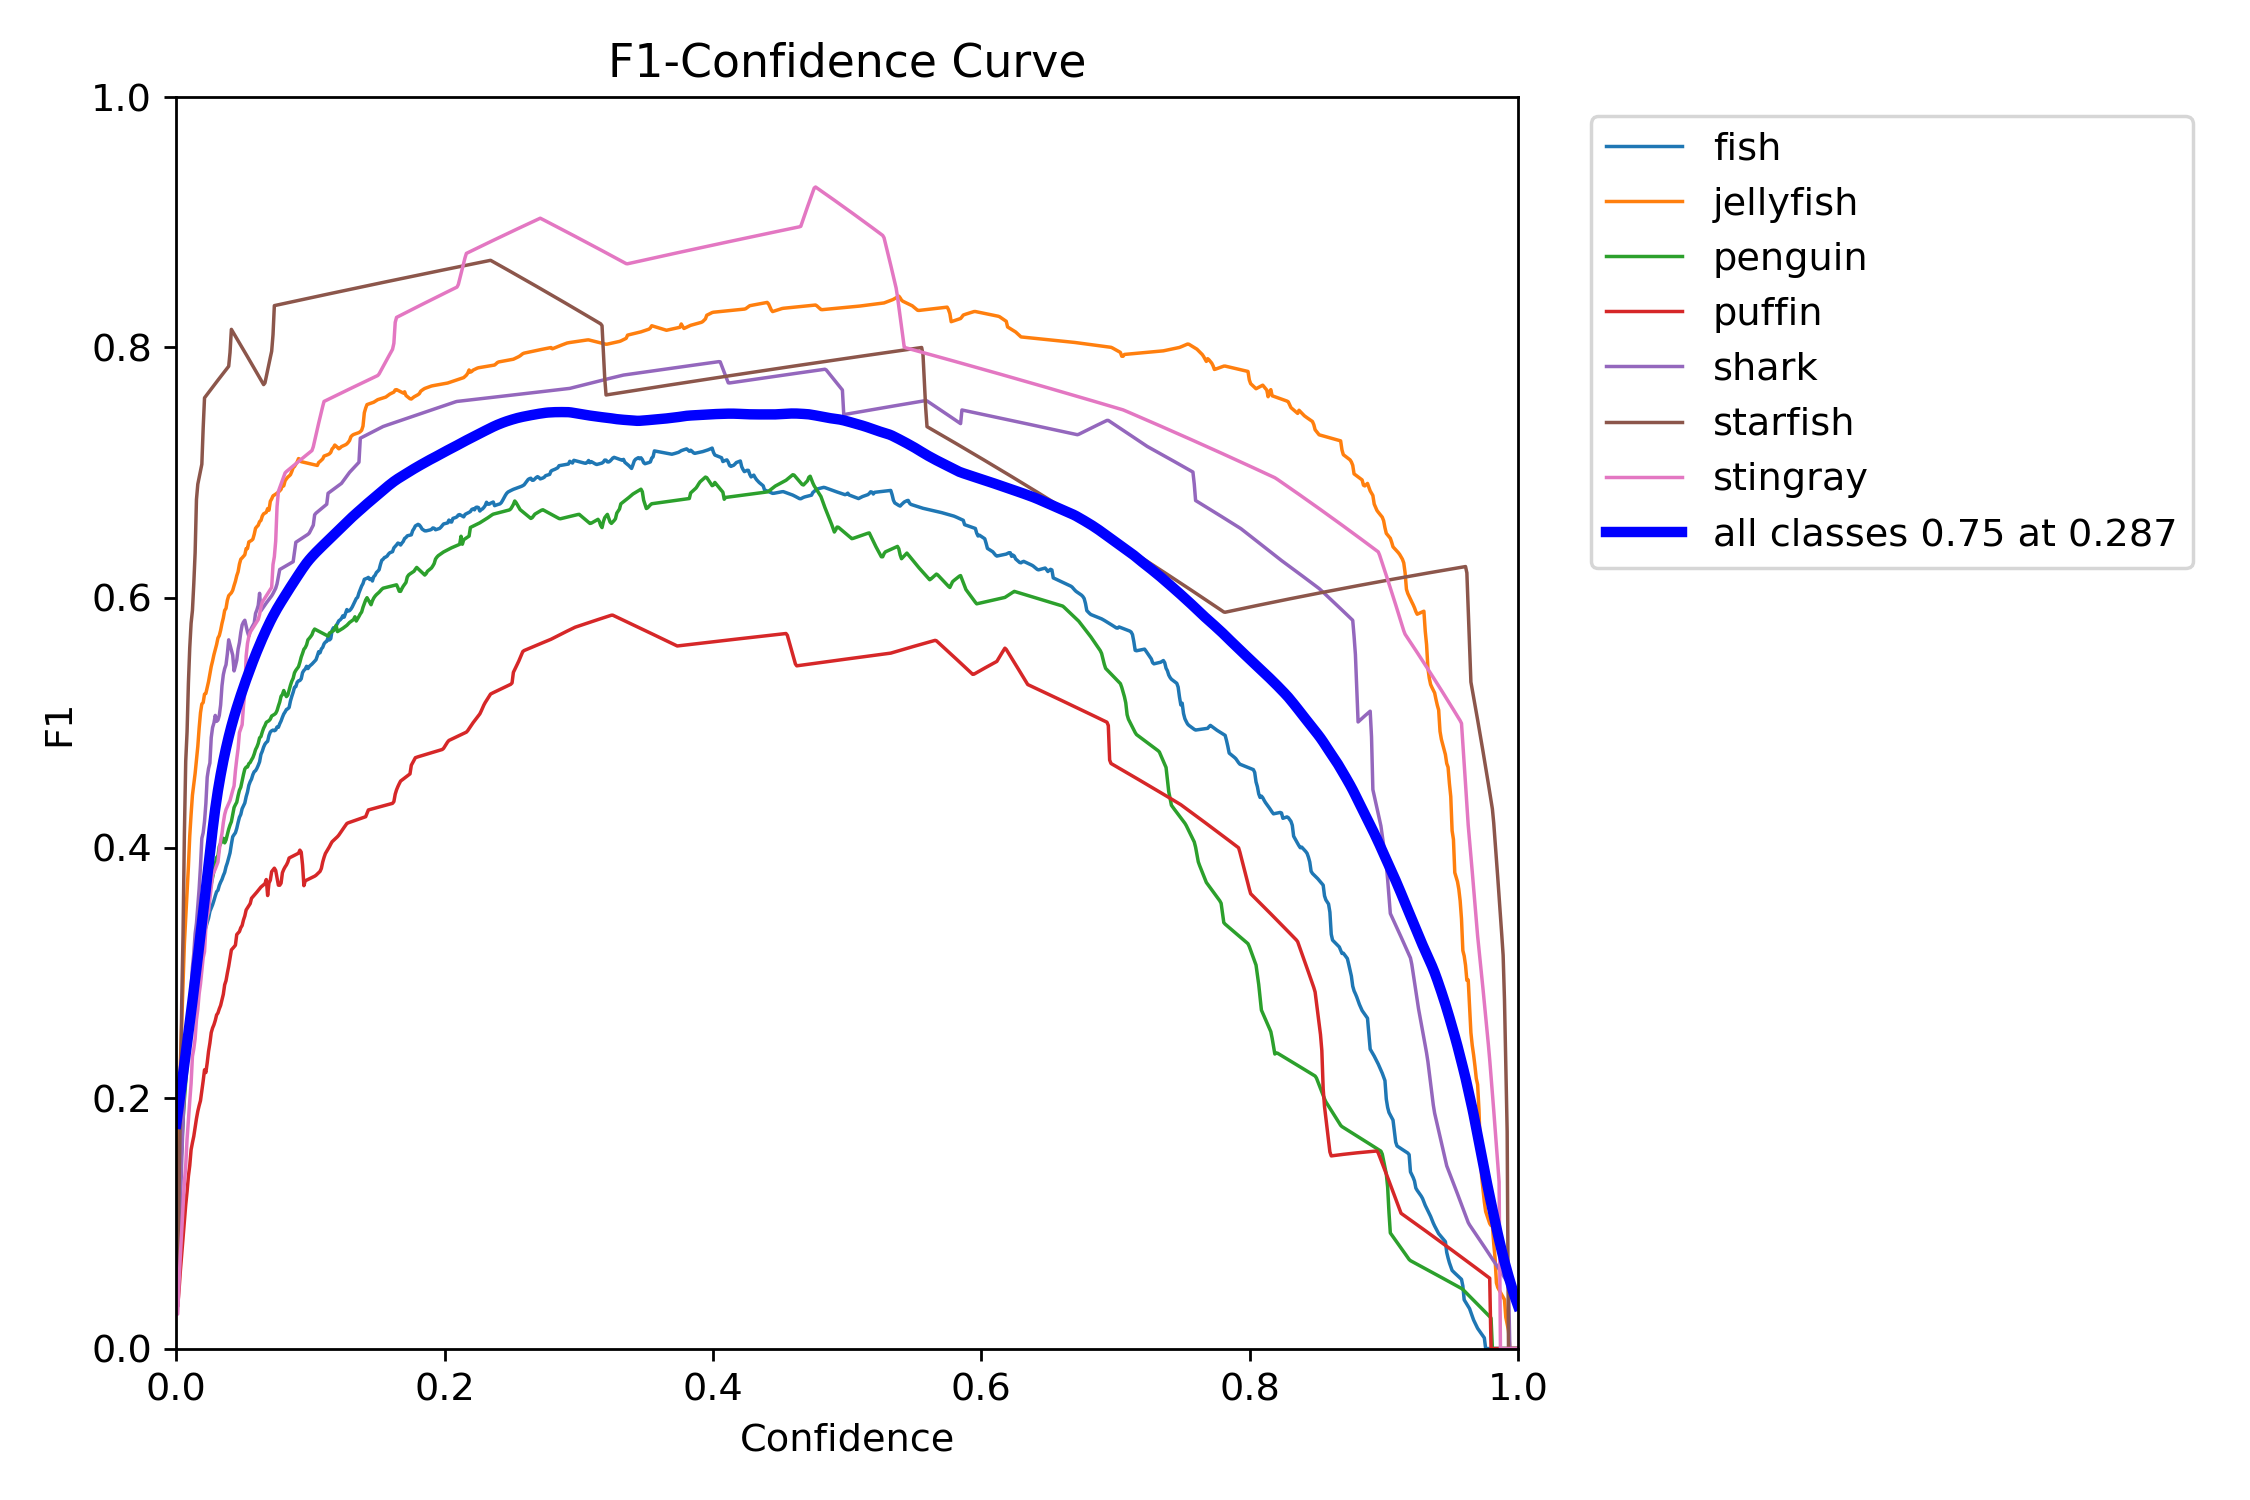

In [52]:
curva_confianca = Image.open('/content/runs/detect/val2/F1_curve.png')
curva_confianca

Matriz de confusão

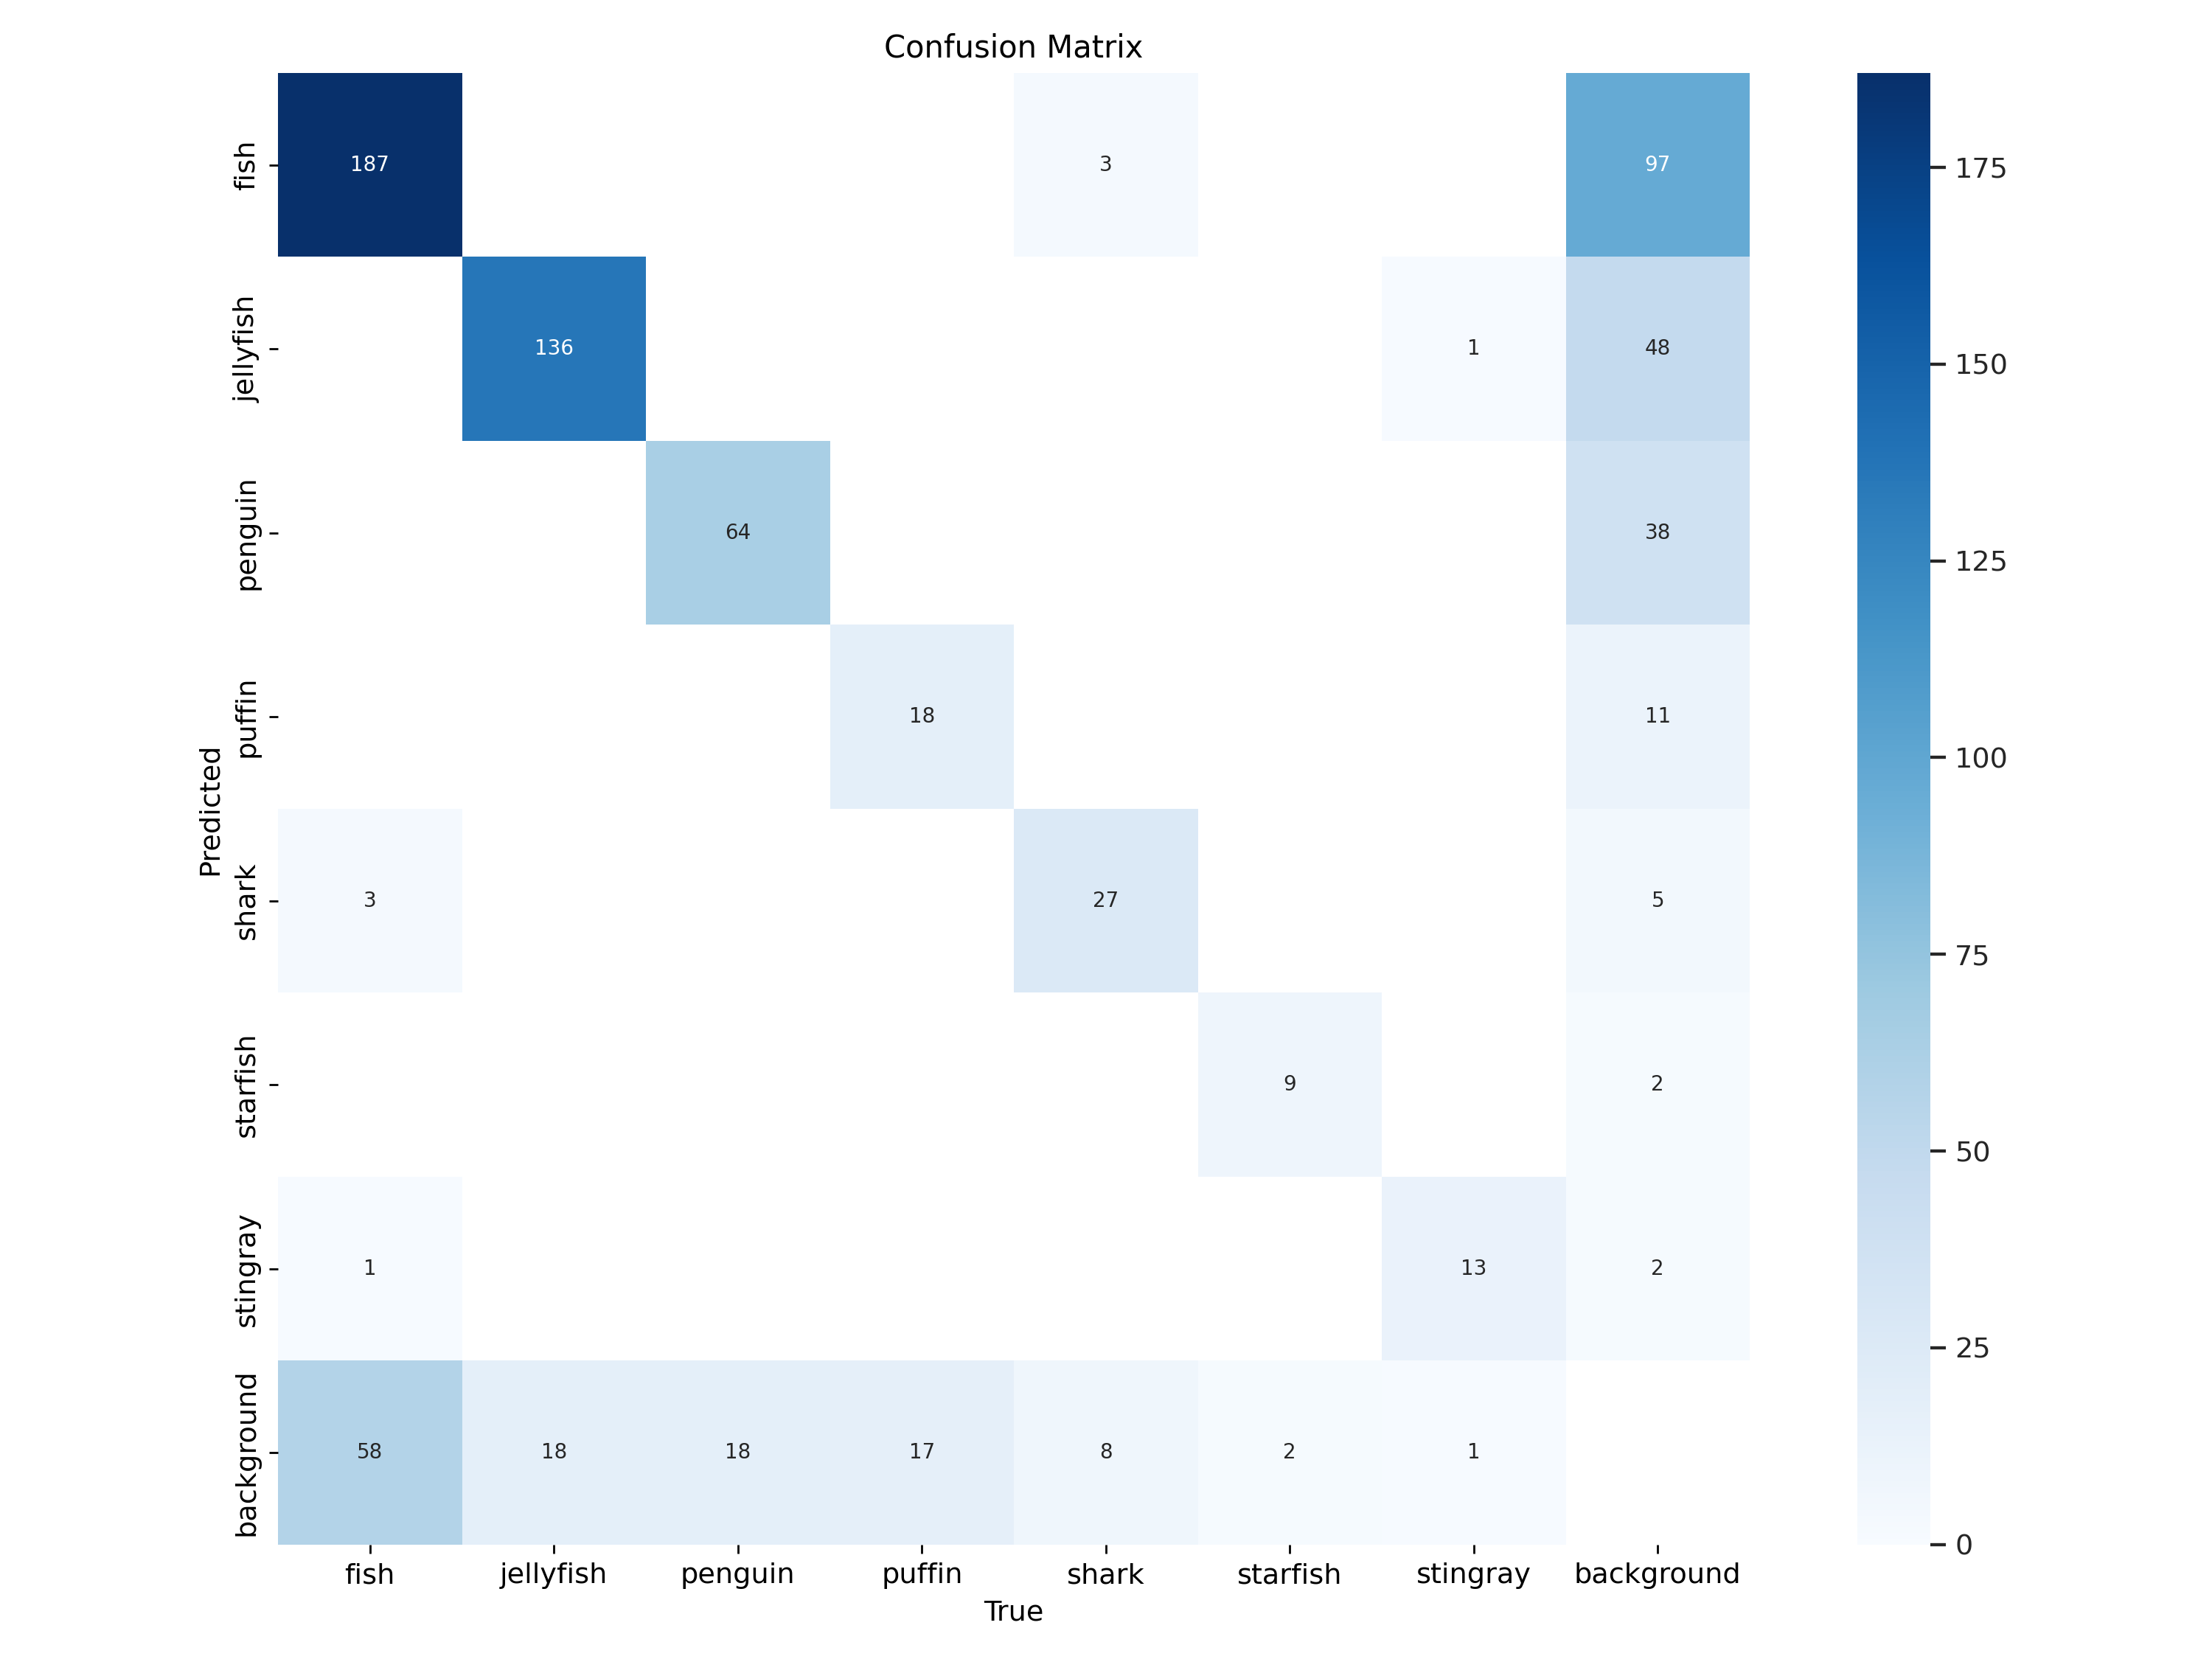

In [51]:
matriz_confusao = Image.open('/content/runs/detect/val2/confusion_matrix.png')
matriz_confusao

# Inferência

In [14]:
results_img = model.predict(source='https://www.bluereefbh.com.br/wp-content/uploads/2023/05/peixe-palhaco.jpeg',  # image or video; single value or a list; URL, PIL (RGB), CV2 (BGR), ...
                        conf=0.25,
                        iou=0.7,  # Non-Maximum Supression (NMS)
                        imgsz=640,
                        show=False,
                        save=True,
                        save_txt=True,  # Salvar cordenação bbox
                        save_conf=True,  # save_txt deve ser True
                        save_crop=True,
                        # project='runs/detect',
                        stream=False  # Fazer inferencia agora (False) or depois (True)
                        )

100%|██████████| 18.5k/18.5k [00:00<00:00, 394kB/s]


image 1/1 /content/peixe-palhaco.jpeg: 640x640 1 fish, 1 jellyfish, 261.0ms
Speed: 6.4ms preprocess, 261.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [15]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78df4d7f7880>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [16]:
results_img[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0.])
conf: tensor([0.9674, 0.5895])
data: tensor([[149.1475, 203.9211, 233.3744, 348.2639,   0.9674,   1.0000],
        [247.6385, 178.4538, 416.4932, 361.2327,   0.5895,   0.0000]])
id: None
is_track: False
orig_shape: (512, 512)
shape: torch.Size([2, 6])
xywh: tensor([[191.2610, 276.0925,  84.2269, 144.3427],
        [332.0659, 269.8433, 168.8547, 182.7789]])
xywhn: tensor([[0.3736, 0.5392, 0.1645, 0.2819],
        [0.6486, 0.5270, 0.3298, 0.3570]])
xyxy: tensor([[149.1475, 203.9211, 233.3744, 348.2639],
        [247.6385, 178.4538, 416.4932, 361.2327]])
xyxyn: tensor([[0.2913, 0.3983, 0.4558, 0.6802],
        [0.4837, 0.3485, 0.8135, 0.7055]])

# Crop de Objetos

In [17]:
model = YOLO('/content/runs/detect/train4/weights/best.pt')

In [18]:
from PIL import Image
import numpy as np
import cv2

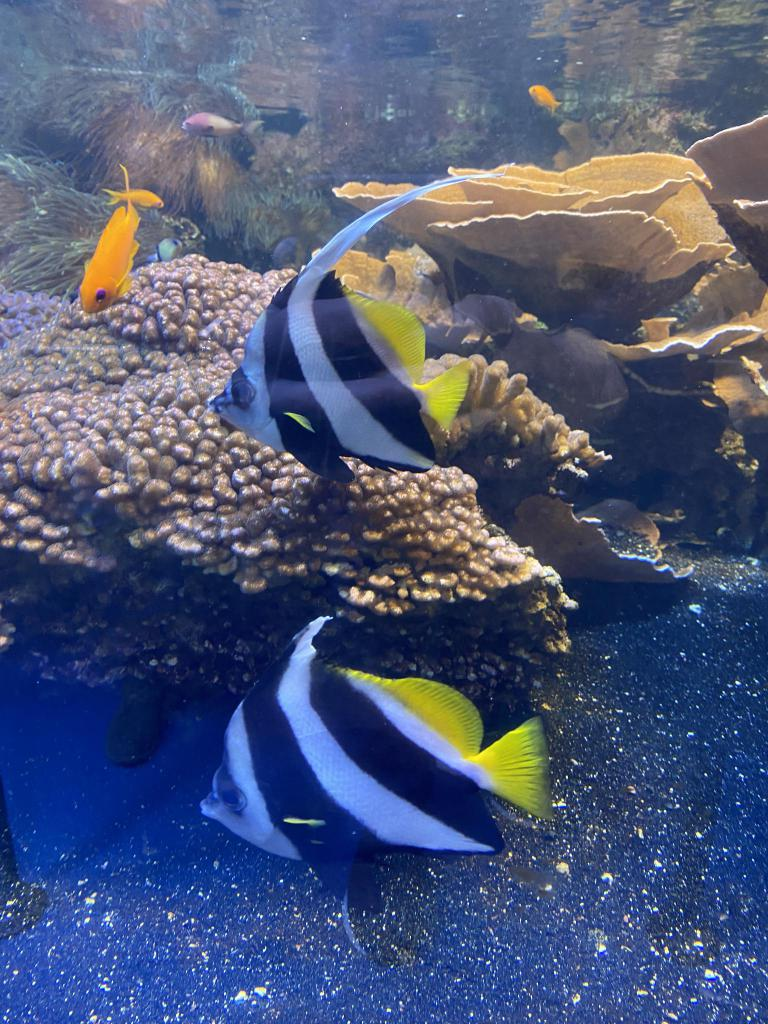

In [45]:
img_pil = Image.open('/content/Dataset/peixes.jpg') # Carregando imagem para ser analizada
img_pil

In [46]:
from PIL import Image, ImageDraw # Dependência para plotar imagem com caixa de delimitadora

results_img_pil = model.predict(
    source=img_pil,  # Imagem carregada
    conf=0.25,
    iou=0.7,
    imgsz=640,
    show=False,
    save=True,
    save_txt=True,  # Salvar coordenadas da caixa delimitadora
    save_conf=True,  # 'save_txt' deve ser True
    save_crop=True,
    # project='runs/detect',
    stream=False  # Fazer inferência agora (False) ou depois (True)
)

# Obtendo as coordenadas das bounding boxes
xyxy = results_img_pil[0].boxes.xyxy.cpu().numpy()

# Abrindo a imagem original
img = img_pil.copy()
draw = ImageDraw.Draw(img)

# Desenhando as bounding boxes na imagem
for box in xyxy:
    draw.rectangle([box[0], box[1], box[2], box[3]], outline="red", width=2)

# Mostrando a imagem com as bounding boxes
img.show()



0: 640x480 5 fishs, 209.0ms
Speed: 4.8ms preprocess, 209.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
4 labels saved to runs/detect/predict2/labels


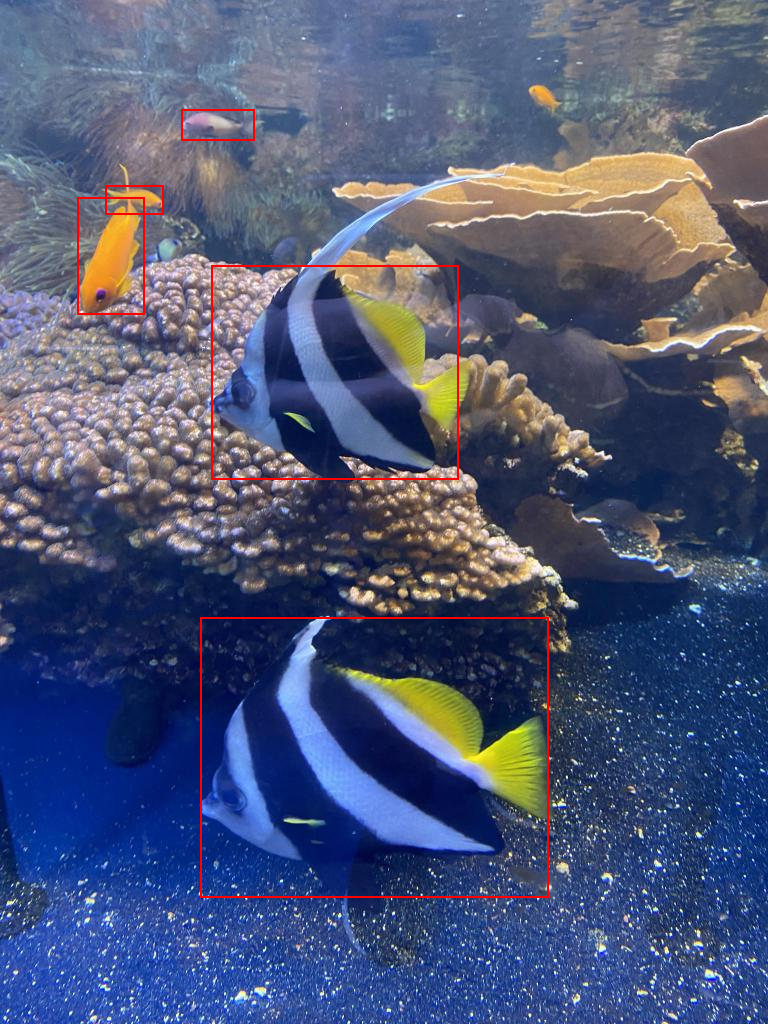

In [44]:
img